In [1]:
pip install generative_diffusion # Instalamos el paquete desarrollado

In [2]:
# Importar componentes del framework de difusión
from generative_diffusion.utils import *
from generative_diffusion.diffusion import ModelFactory
from generative_diffusion.score_networks import ScoreNet

In [3]:
# Configurar parámetros
BATCH_SIZE = 32
N_EPOCHS = 30
LR = 1e-3
CHECKPOINT_INTERVAL = 5

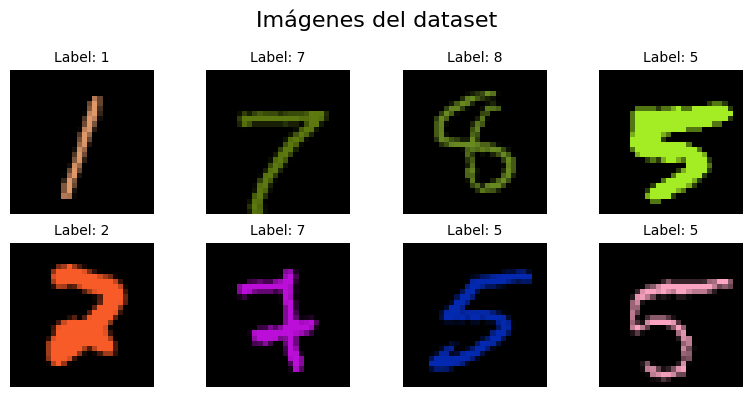

In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Lambda(lambda x: x * torch.tensor([random.random(), random.random(), random.random()]).view(3,1,1))
])

dataset = datasets.MNIST(root='../data', 
                         train=True,
                         download=True,
                         transform=transform)

train_dataloader = DataLoader(
    dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True)

# Visualizar un batch de imágenes
show_images(train_dataloader, n_images=8, title="Imágenes del dataset")

# Modelos

---
## VE

In [5]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="probability_flow_ode",
)

2025-05-05 00:01:50,047 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [6]:
# N_EPOCHS = 30
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_ve.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "ve_sde"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [7]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="euler_maruyama",
)

2025-05-05 00:01:50,087 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [8]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_euler.load_score_model("../checkpoints/ve_sde.pt")

2025-05-05 00:01:50,112 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-05 00:01:50,374 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:01:50,376 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:01:50,421 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:01:50,428 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:01:50,466 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 5...


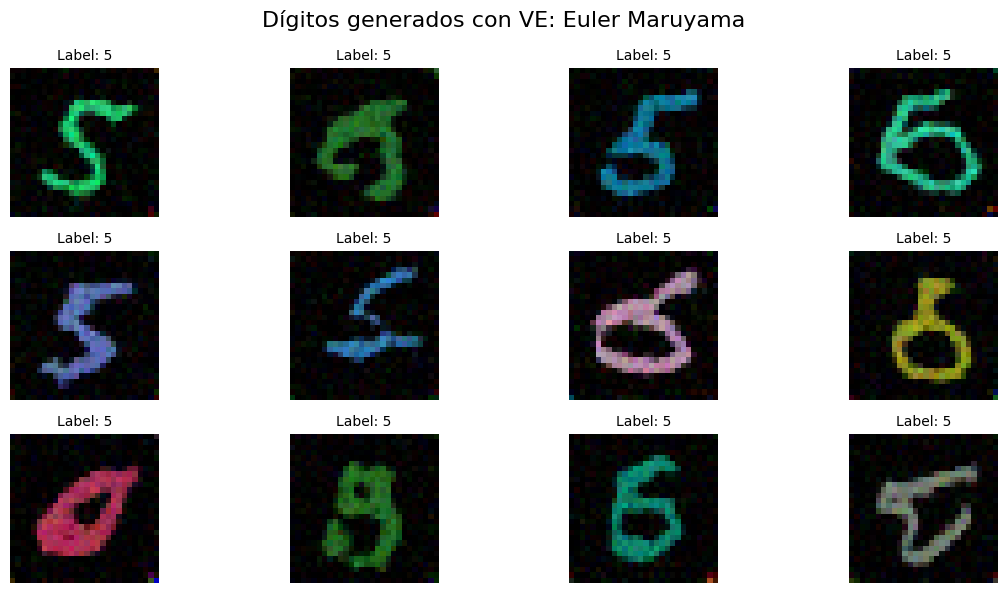

In [9]:
DIGIT_CLASS = 5

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_euler, condition = diffusion_model_ve_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_euler, title="Dígitos generados con VE: Euler Maruyama", labels=condition)

2025-05-05 00:02:21,368 — DiffusionModel — WARNING — No se proporcionó condición, se usará un tensor aleatorio de condición
2025-05-05 00:02:21,371 — DiffusionModel — INFO — Generando 16 muestras con 5000 pasos


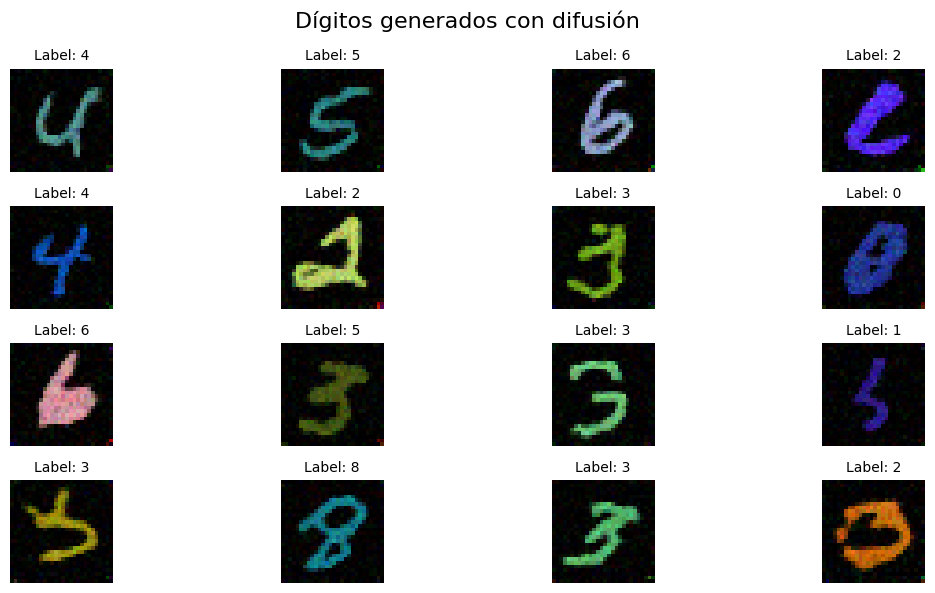

In [10]:
# Parámetros para generación
N_SAMPLES = 16
N_STEPS = 5000

# Generar imágenes
generated_images_ve_euler, condition = diffusion_model_ve_euler.generate(
    n_samples=N_SAMPLES,
    n_steps=N_STEPS,
)

# Mostrar imágenes generadas
show_images(generated_images_ve_euler, title="Dígitos generados con difusión", labels=condition)

### Predictor - Corrector

In [11]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="predictor_corrector",
)

2025-05-05 00:03:11,973 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [12]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_predictor.load_score_model("../checkpoints/ve_sde.pt")

2025-05-05 00:03:11,992 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-05 00:03:12,025 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:03:12,026 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:03:12,068 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:03:12,073 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:03:12,107 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 7...


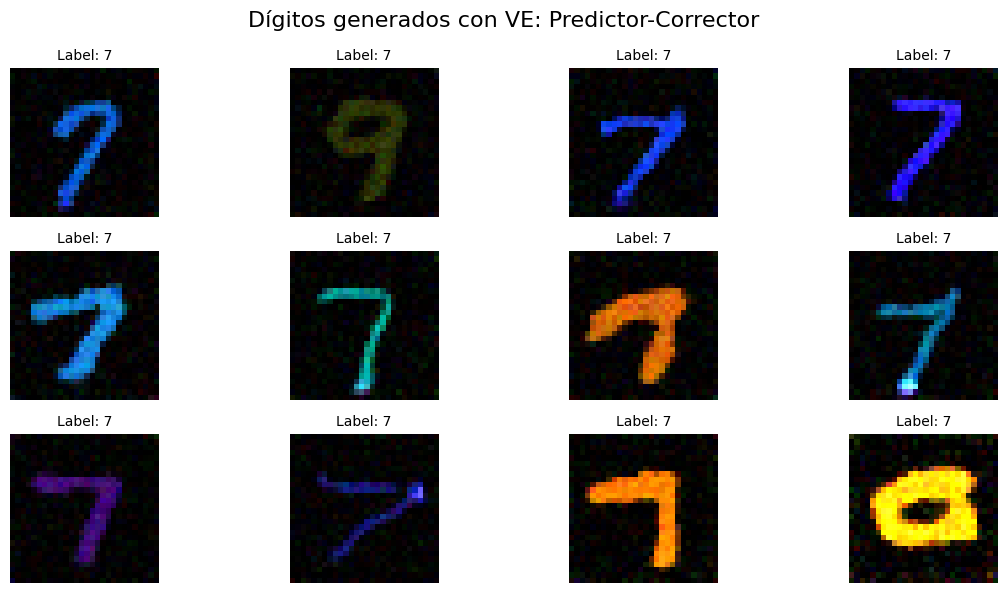

In [13]:
DIGIT_CLASS = 7

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_predictor, condition = diffusion_model_ve_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_predictor, title="Dígitos generados con VE: Predictor-Corrector", labels=condition)

### Flow ODE

In [14]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="probability_flow_ode",
)

2025-05-05 00:06:01,995 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [15]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_flow_ode.load_score_model("../checkpoints/ve_sde.pt")

2025-05-05 00:06:02,015 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-05 00:06:02,051 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:06:02,053 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:06:02,108 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:06:02,114 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:06:02,134 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 9...


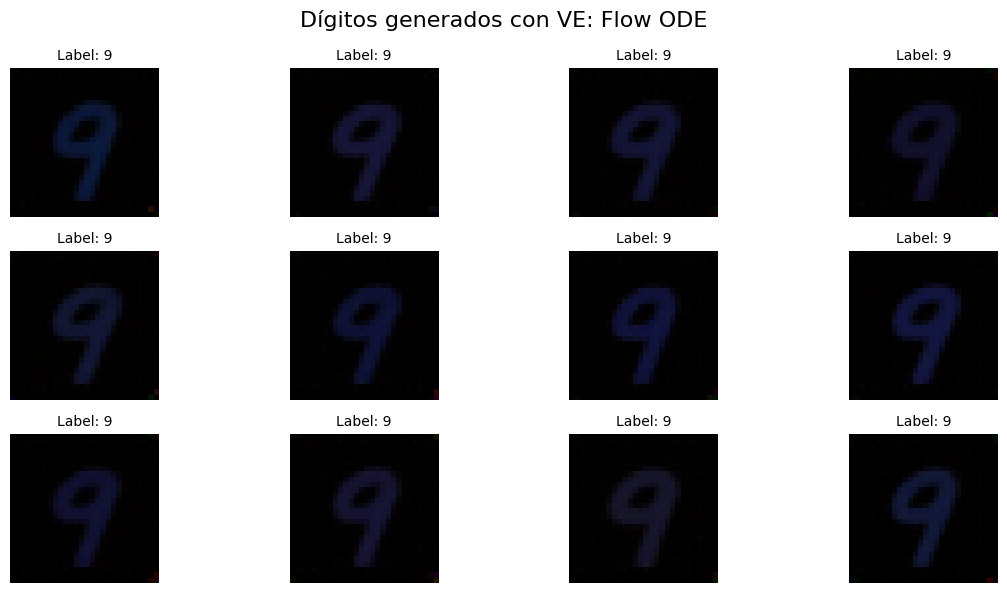

In [16]:
DIGIT_CLASS = 9

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_flow_ode, condition = diffusion_model_ve_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_flow_ode, title="Dígitos generados con VE: Flow ODE", labels=condition)

### Exponential Integrator

In [17]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="exponential_integrator",
)

2025-05-05 00:06:32,712 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [18]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_exponential.load_score_model("../checkpoints/ve_sde.pt")

2025-05-05 00:06:32,726 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-05 00:06:32,745 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:06:32,746 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:06:32,787 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:06:32,793 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:06:32,823 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 5...


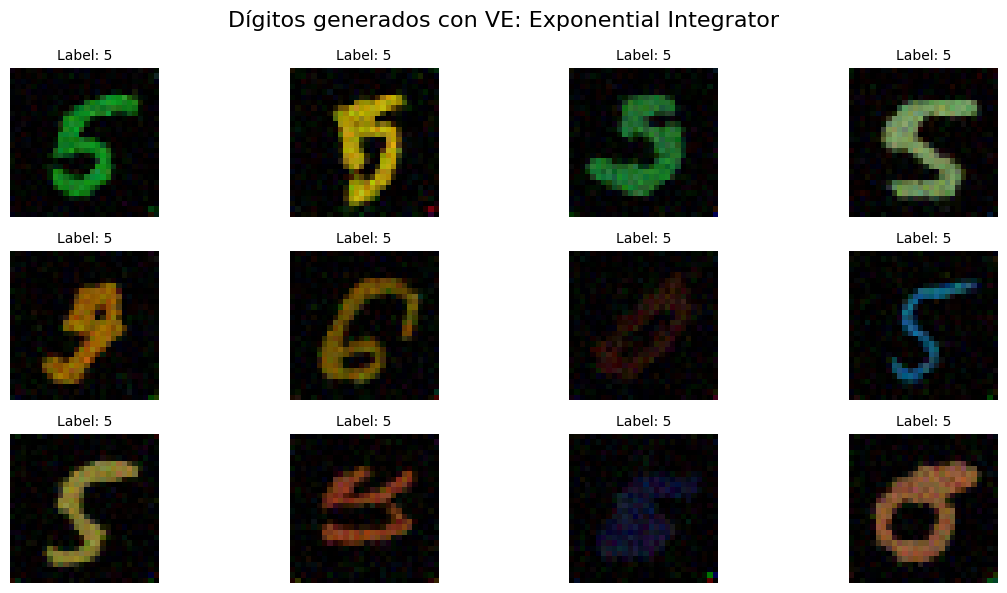

In [19]:
DIGIT_CLASS = 5

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_exponential, condition = diffusion_model_ve_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_exponential, title="Dígitos generados con VE: Exponential Integrator", labels=condition)

---
## VP - Linear

In [20]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-05 00:06:49,885 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [21]:
# N_EPOCHS = 32
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_vp_linear.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "vp_sde_linear"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [22]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-05 00:06:49,918 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [23]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_euler.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-05 00:06:49,937 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-05 00:06:50,010 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:06:50,013 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:06:50,075 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:06:50,080 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:06:50,101 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 8...


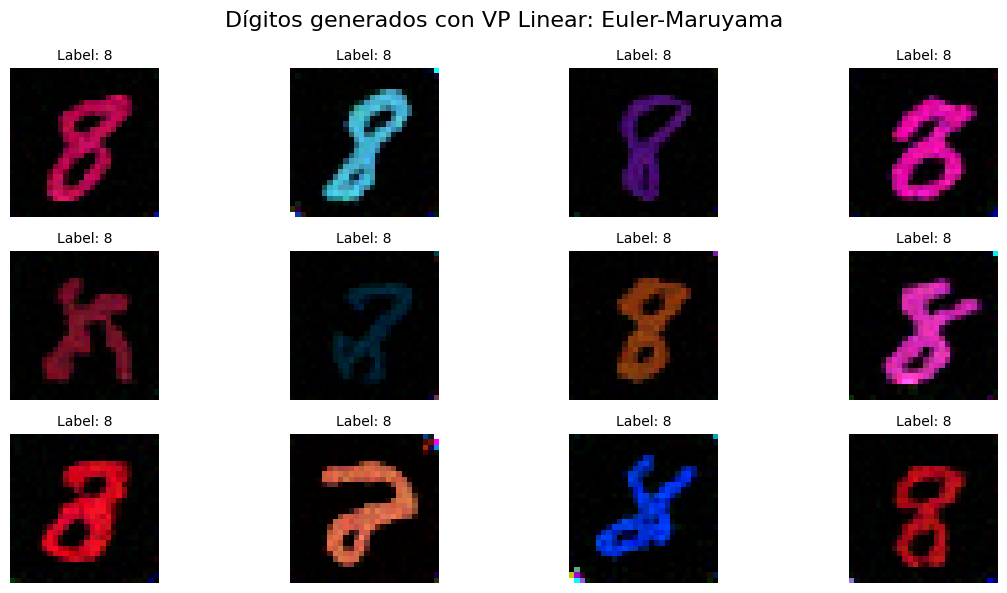

In [24]:
DIGIT_CLASS = 8

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_linear_euler, condition = diffusion_model_vp_linear_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_linear_euler, title="Dígitos generados con VP Linear: Euler-Maruyama", labels=condition)

### Predictor corrector

In [25]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='linear',
)

2025-05-05 00:07:07,679 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [26]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_predictor.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-05 00:07:07,696 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-05 00:07:07,718 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:07:07,720 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:07:07,759 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:07:07,766 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:07:07,795 — DiffusionModel — INFO — Generando 12 muestras con 1000 pasos


Generando imágenes del dígito 3...


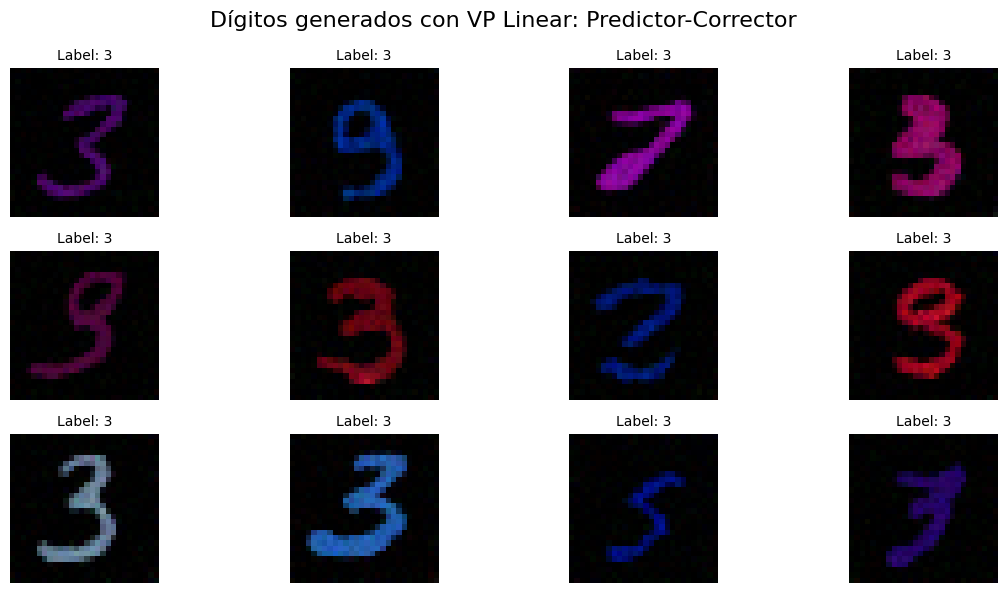

In [27]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_linear_predictor, condition = diffusion_model_vp_linear_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_linear_predictor, title="Dígitos generados con VP Linear: Predictor-Corrector", labels=condition)

### Flow ODE

In [5]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_score': 1.05},
    sampler_name='probability_flow_ode',
    scheduler_name='linear',
)

2025-05-05 00:12:14,550 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [6]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_flow_ode.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-05 00:12:14,568 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-05 00:12:14,817 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:12:14,819 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:12:14,863 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:12:14,870 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:12:14,894 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 0...


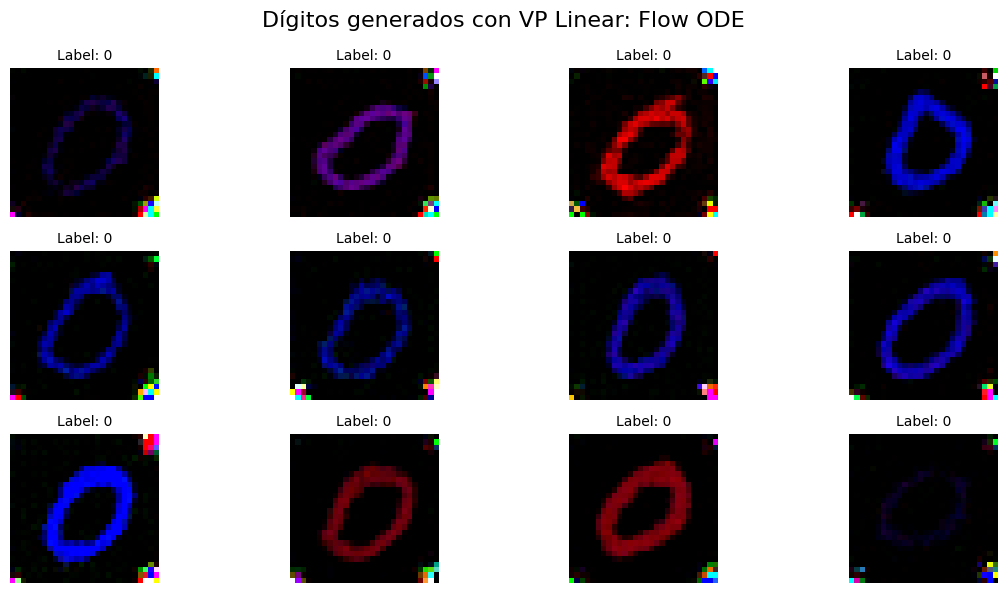

In [7]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_flow_ode, condition = diffusion_model_vp_linear_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_flow_ode, title="Dígitos generados con VP Linear: Flow ODE", labels=condition)

### Exponential Integrator

In [8]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-05 00:12:47,523 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [9]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_exponential.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-05 00:12:47,538 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-05 00:12:47,564 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:12:47,565 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:12:47,610 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:12:47,616 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:12:47,644 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 4...


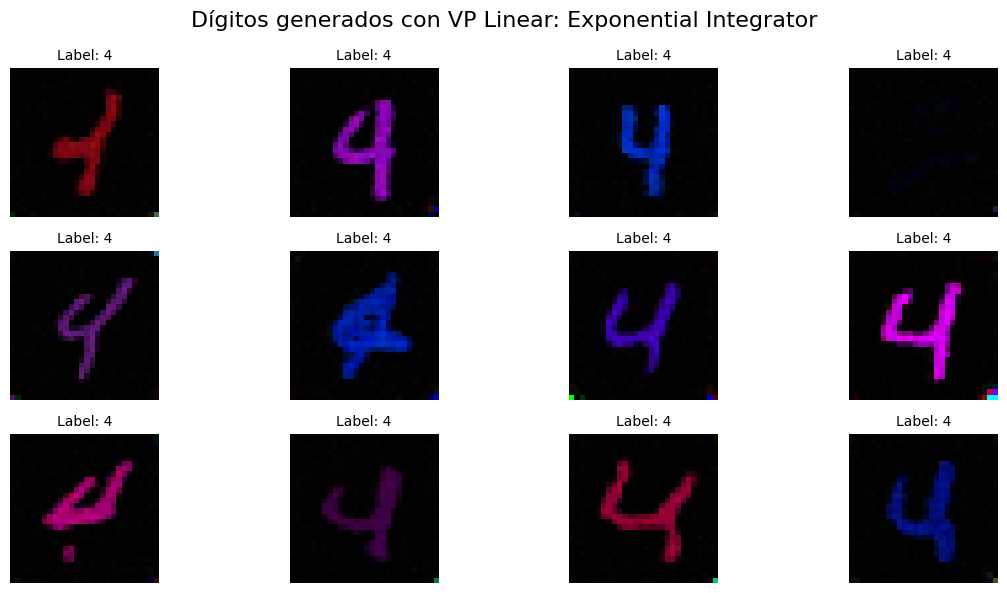

In [10]:
DIGIT_CLASS = 4

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_exponential_integrator, condition = diffusion_model_vp_linear_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_exponential_integrator, title="Dígitos generados con VP Linear: Exponential Integrator", labels=condition)

---
## VP - Cosine

In [11]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-05 00:13:05,903 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [12]:
# N_EPOCHS = 34
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_vp_cosine.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "vp_sde_cosine"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [13]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_beta': 0.4, 'coef_score': 1.2},
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-05 00:13:05,934 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [14]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_euler.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-05 00:13:05,947 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-05 00:13:06,001 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:13:06,002 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:13:06,066 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:13:06,074 — DiffusionModel — INFO — Modelo cargado correctamente


Generando imágenes del dígito 2...


2025-05-05 00:13:06,104 — DiffusionModel — INFO — Generando 12 muestras con 3000 pasos


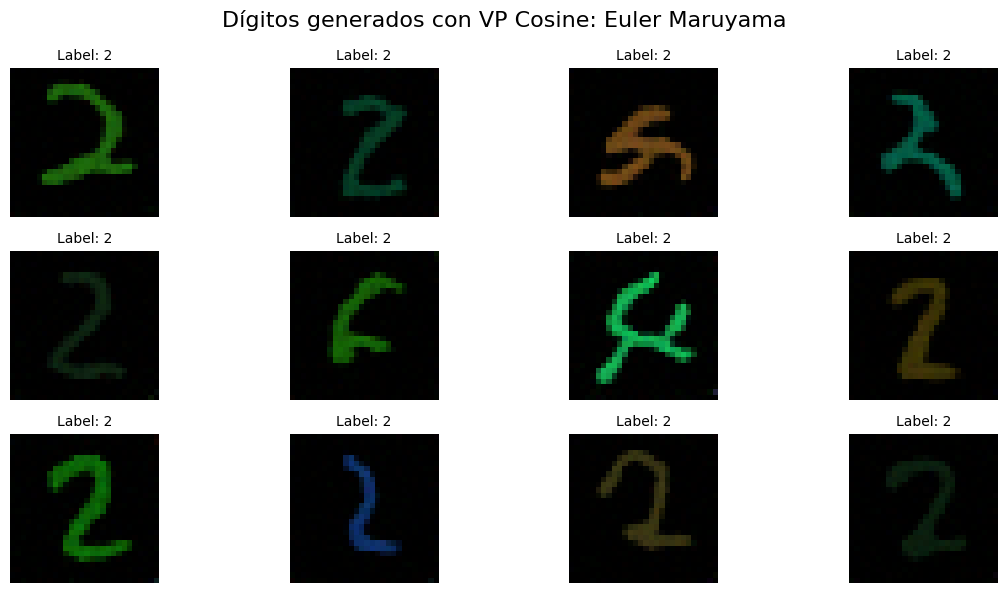

In [15]:
DIGIT_CLASS = 2

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 3000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_euler, condition = diffusion_model_vp_cosine_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_euler, title="Dígitos generados con VP Cosine: Euler Maruyama", labels=condition)

### Predictor - Corrector

In [16]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
)

2025-05-05 00:13:32,684 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [17]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_predictor.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-05 00:13:32,701 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-05 00:13:32,725 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:13:32,727 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:13:32,766 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:13:32,772 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:13:32,798 — DiffusionModel — INFO — Generando 12 muestras con 1000 pasos


Generando imágenes del dígito 6...


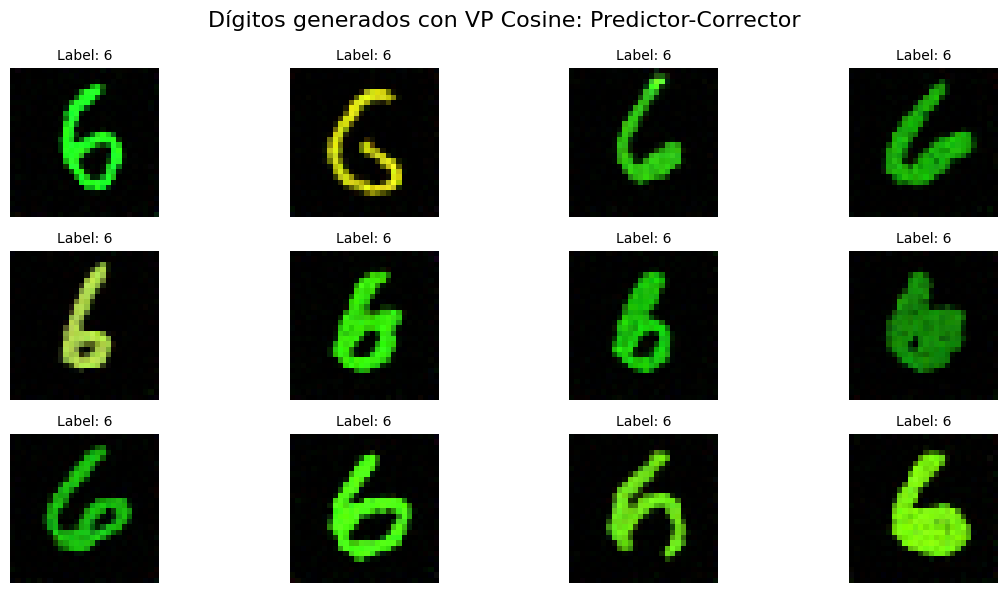

In [18]:
DIGIT_CLASS = 6

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_predictor, condition = diffusion_model_vp_cosine_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_predictor, title="Dígitos generados con VP Cosine: Predictor-Corrector", labels=condition)

### Flow ODE

In [19]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.25},
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
)

2025-05-05 00:14:59,896 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [20]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_flow_ode.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-05 00:14:59,912 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-05 00:14:59,938 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:14:59,939 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:14:59,979 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:14:59,985 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:15:00,008 — DiffusionModel — INFO — Generando 12 muestras con 1000 pasos


Generando imágenes del dígito 9...


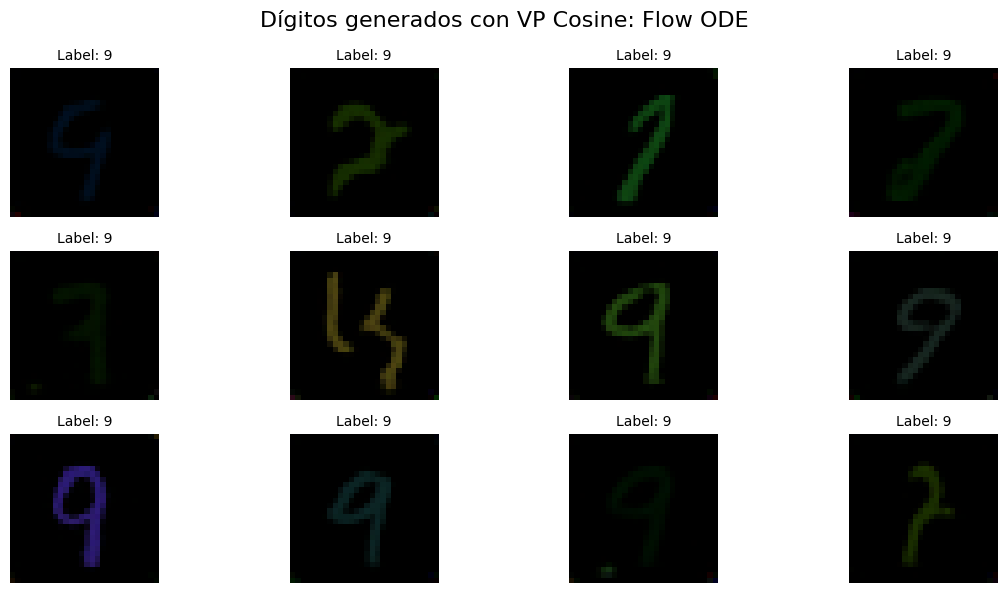

In [21]:
DIGIT_CLASS = 9

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_flow_ode, condition = diffusion_model_vp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_flow_ode, title="Dígitos generados con VP Cosine: Flow ODE", labels=condition)

### Exponential Integrator

In [22]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
)

2025-05-05 00:15:16,697 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [23]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_exponential.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-05 00:15:16,711 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-05 00:15:16,732 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:15:16,733 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:15:16,772 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:15:16,780 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:15:16,804 — DiffusionModel — INFO — Generando 12 muestras con 3000 pasos


Generando imágenes del dígito 3...


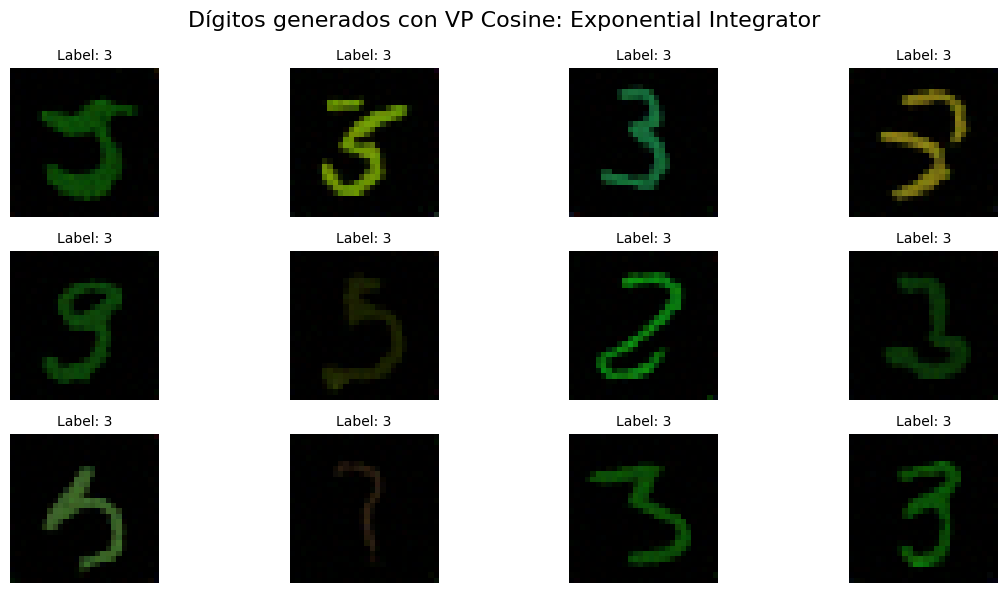

In [24]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 3000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_exponential, condition = diffusion_model_vp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_exponential, title="Dígitos generados con VP Cosine: Exponential Integrator", labels=condition)

---
## SubVP - Linear

In [25]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-05 00:15:44,445 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [26]:
# N_EPOCHS = 34
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_subvp_linear.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "subvp_sde_linear"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [27]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_score': 1.22},
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-05 00:15:44,475 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [28]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_euler.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-05 00:15:44,491 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-05 00:15:44,546 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:15:44,548 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:15:44,606 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:15:44,613 — DiffusionModel — INFO — Modelo cargado correctamente


Generando imágenes del dígito 0...


2025-05-05 00:15:44,650 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


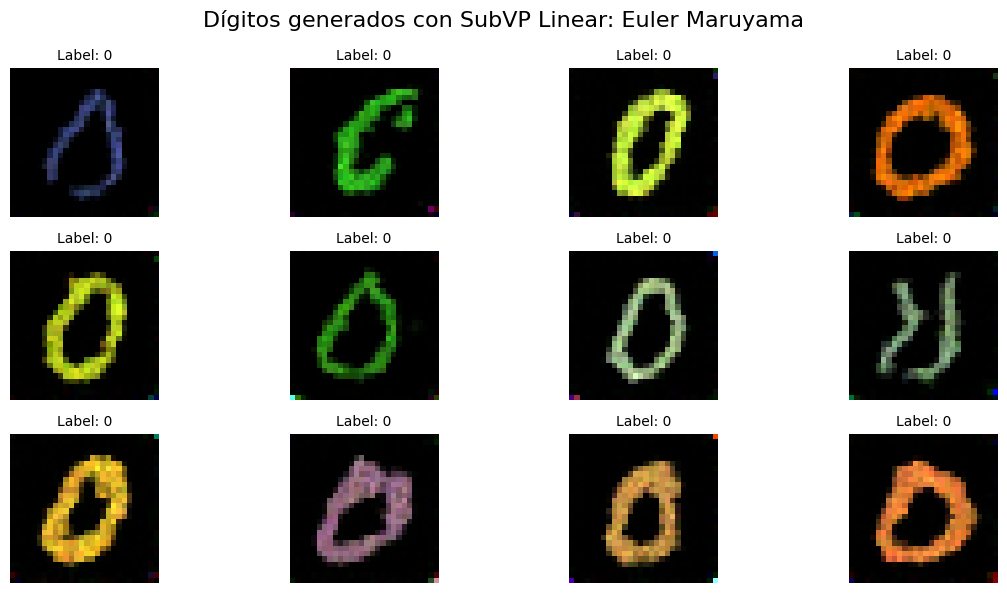

In [29]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_euler, condition = diffusion_model_subvp_linear_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_euler, title="Dígitos generados con SubVP Linear: Euler Maruyama", labels=condition)

### Predictor - Corrector

In [5]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
    sampler_name='predictor_corrector',
    scheduler_name='linear',
)

2025-05-05 00:18:26,424 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [6]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_predictor.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-05 00:18:26,440 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-05 00:18:26,642 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:18:26,644 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:18:26,688 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:18:26,692 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:18:26,717 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 7...


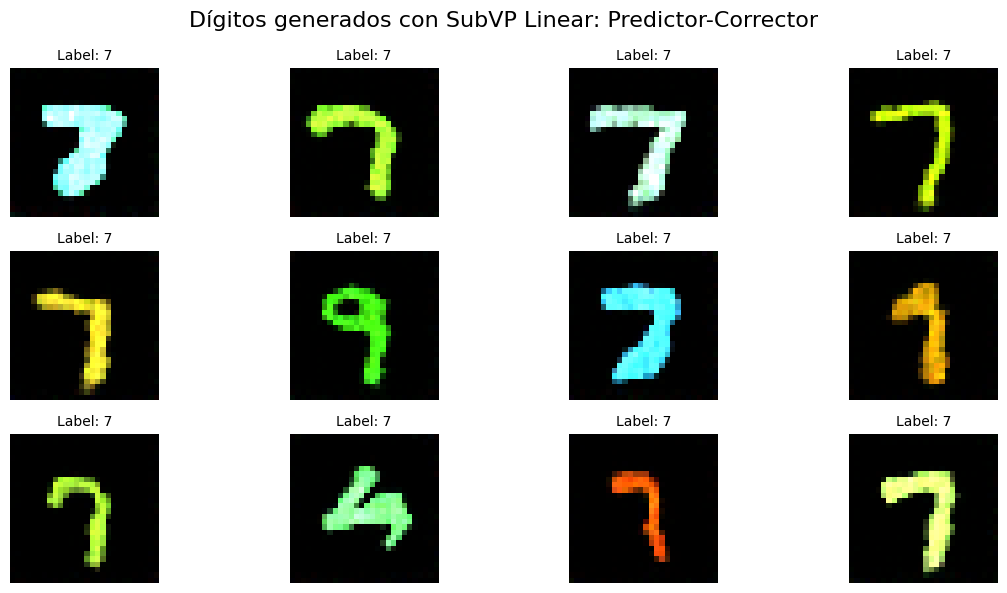

In [7]:
DIGIT_CLASS = 7

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_predictor, condition = diffusion_model_subvp_linear_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_predictor, title="Dígitos generados con SubVP Linear: Predictor-Corrector", labels=condition)

### Flow ODE

In [8]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.05},
    sampler_name='probability_flow_ode',
    scheduler_name='linear',
)

2025-05-05 00:21:20,544 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [9]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_flow_ode.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-05 00:21:20,575 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-05 00:21:20,624 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:21:20,626 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:21:20,685 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:21:20,697 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:21:20,733 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 0...


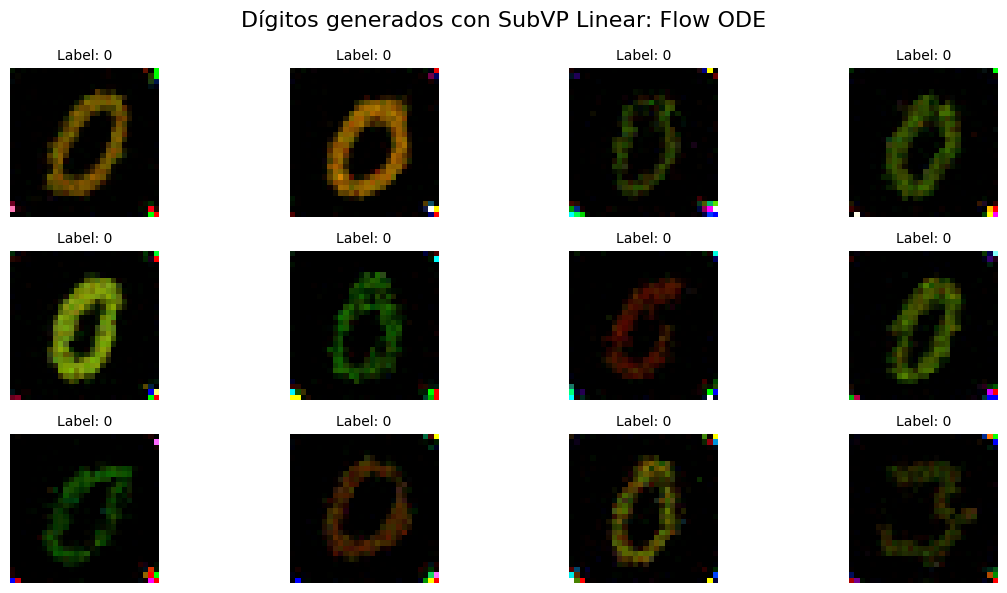

In [10]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_flow_ode, condition = diffusion_model_subvp_linear_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_flow_ode, title="Dígitos generados con SubVP Linear: Flow ODE", labels=condition)

### Exponential Integrator

In [11]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.45, 'coef_score': 1.1},
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-05 00:21:53,693 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [12]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_exponential.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-05 00:21:53,708 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-05 00:21:53,728 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:21:53,729 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:21:53,765 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:21:53,772 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:21:53,792 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 4...


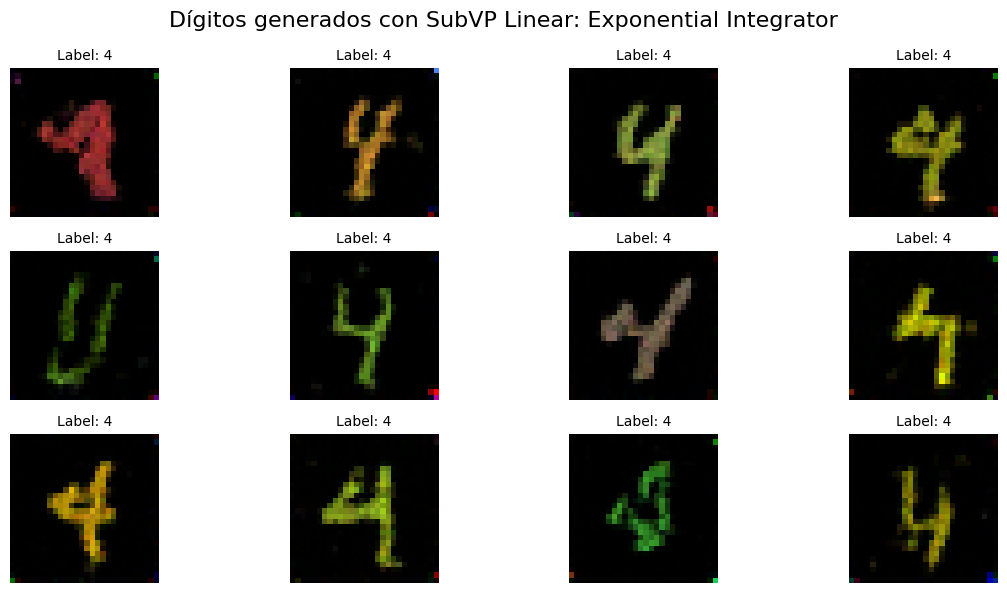

In [13]:
DIGIT_CLASS = 4

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_exponential, condition = diffusion_model_subvp_linear_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_exponential, title="Dígitos generados con SubVP Linear: Exponential Integrator", labels=condition)

---
## SubVP - Cosine

In [14]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-05 00:22:14,362 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [15]:
# N_EPOCHS = 38
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_subvp_cosine.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "subvp_sde_cosine"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [16]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.52, 'coef_score': 1.32},
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-05 00:22:14,390 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [17]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_euler.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-05 00:22:14,404 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-05 00:22:14,477 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:22:14,488 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:22:14,550 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:22:14,557 — DiffusionModel — INFO — Modelo cargado correctamente


Generando imágenes del dígito 1...

2025-05-05 00:22:14,593 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


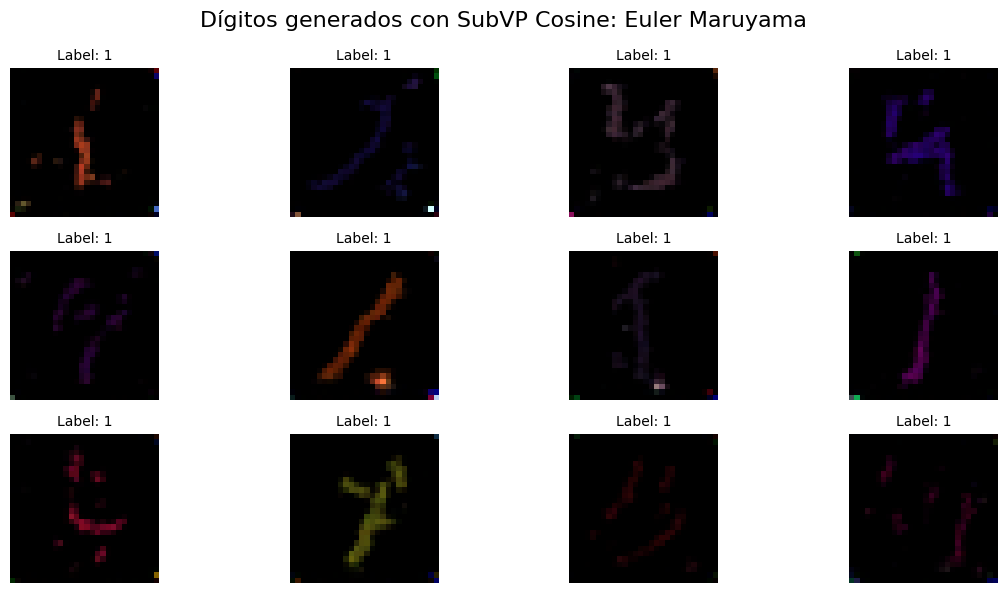

In [18]:
DIGIT_CLASS = 1

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_euler, condition = diffusion_model_subvp_cosine_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_euler, title="Dígitos generados con SubVP Cosine: Euler Maruyama", labels=condition)

### Predictor - corrector

In [19]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_score': 1.05},
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
)

2025-05-05 00:22:33,756 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [20]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_predictor.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-05 00:22:33,770 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-05 00:22:33,792 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:22:33,793 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:22:33,829 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:22:33,838 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:22:33,862 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 3...


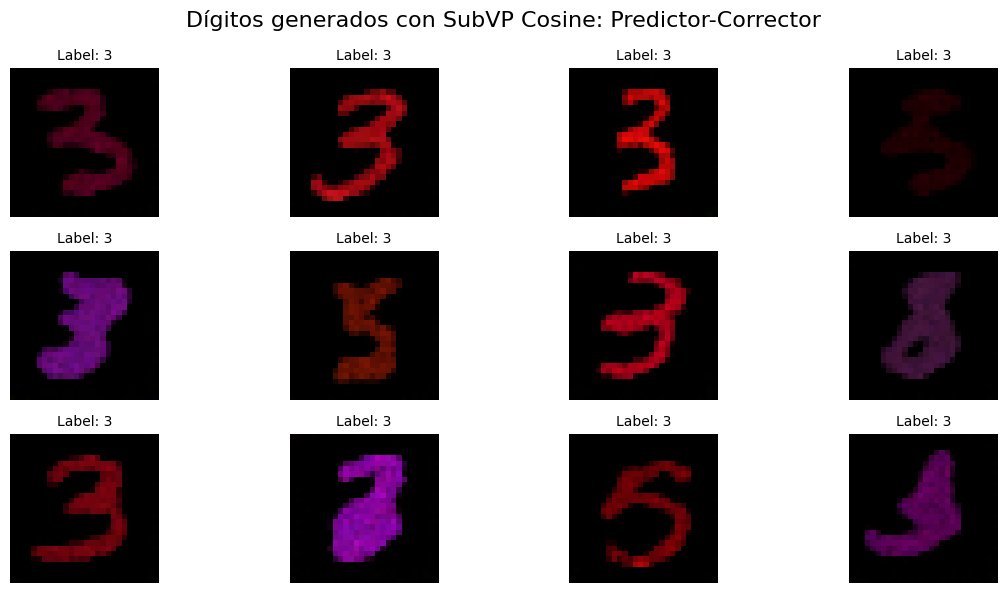

In [21]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_predictor, condition = diffusion_model_subvp_cosine_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_predictor, title="Dígitos generados con SubVP Cosine: Predictor-Corrector", labels=condition)

### Flow ODE

In [22]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.58, 'coef_score': 1.46},
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
)

2025-05-05 00:25:26,793 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [23]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_flow_ode.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-05 00:25:26,812 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-05 00:25:26,845 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:25:26,846 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:25:26,884 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:25:26,889 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:25:26,938 — DiffusionModel — INFO — Generando 12 muestras con 2000 pasos


Generando imágenes del dígito 3...


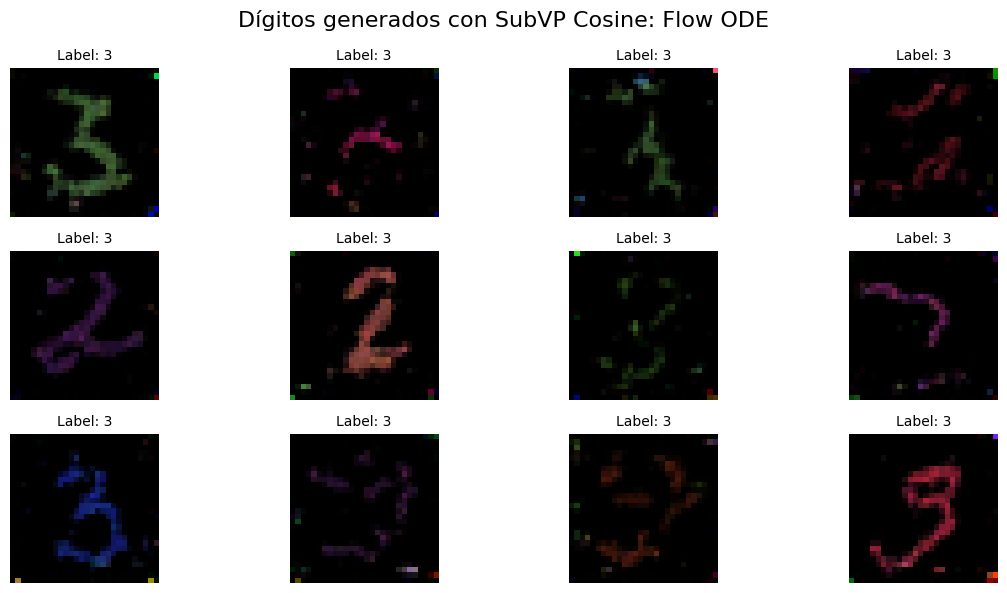

In [24]:
DIGIT_CLASS = 3

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_flow_ode, condition = diffusion_model_subvp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_flow_ode, title="Dígitos generados con SubVP Cosine: Flow ODE", labels=condition)

### Exponential Integrator

In [25]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sde_kwargs={'coef_beta': 0.65, 'coef_score': 1.42},
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
)

2025-05-05 00:25:57,896 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [26]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_exponential.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-05 00:25:57,910 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-05 00:25:57,934 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:25:57,936 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:25:57,968 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:25:57,974 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:25:57,995 — DiffusionModel — INFO — Generando 12 muestras con 2500 pasos


Generando imágenes del dígito 9...


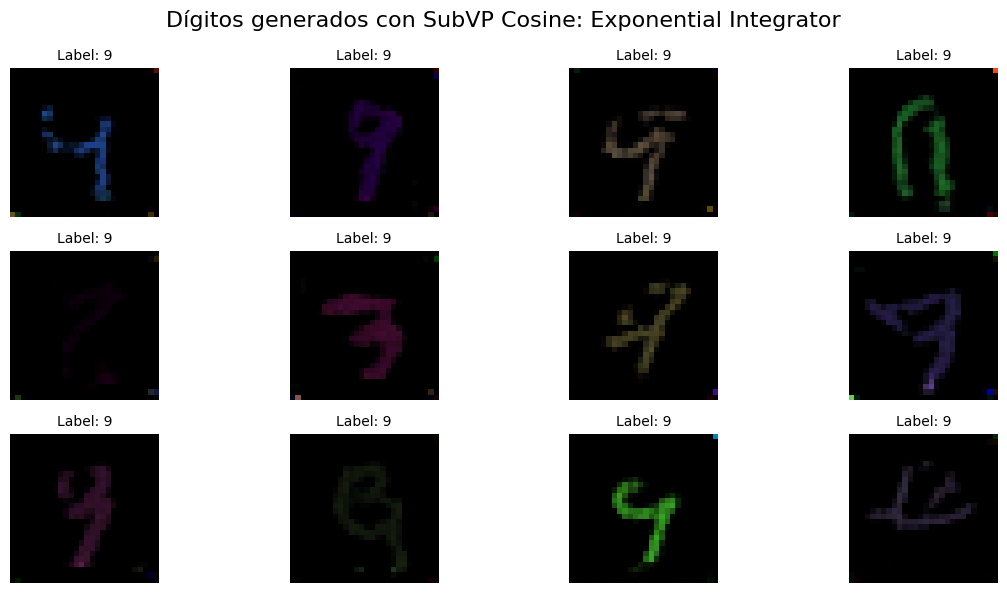

In [27]:
DIGIT_CLASS = 9

# Parámetros para generación
N_SAMPLES = 12
N_STEPS = 2500

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_exponential, condition = diffusion_model_subvp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_exponential, title="Dígitos generados con SubVP Cosine: Exponential Integrator", labels=condition)

---
# Imputation

In [28]:
N_SAMPLES = 8

## VE - Flow ODE

In [29]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_flow_ode_imputation = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name='probability_flow_ode',
)

2025-05-05 00:26:21,499 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [30]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_flow_ode_imputation.load_score_model("../checkpoints/ve_sde.pt")

2025-05-05 00:26:21,522 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-05 00:26:21,557 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:26:21,559 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:26:21,596 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:26:21,601 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:26:21,645 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Imputando las imágenes enmascaradas...


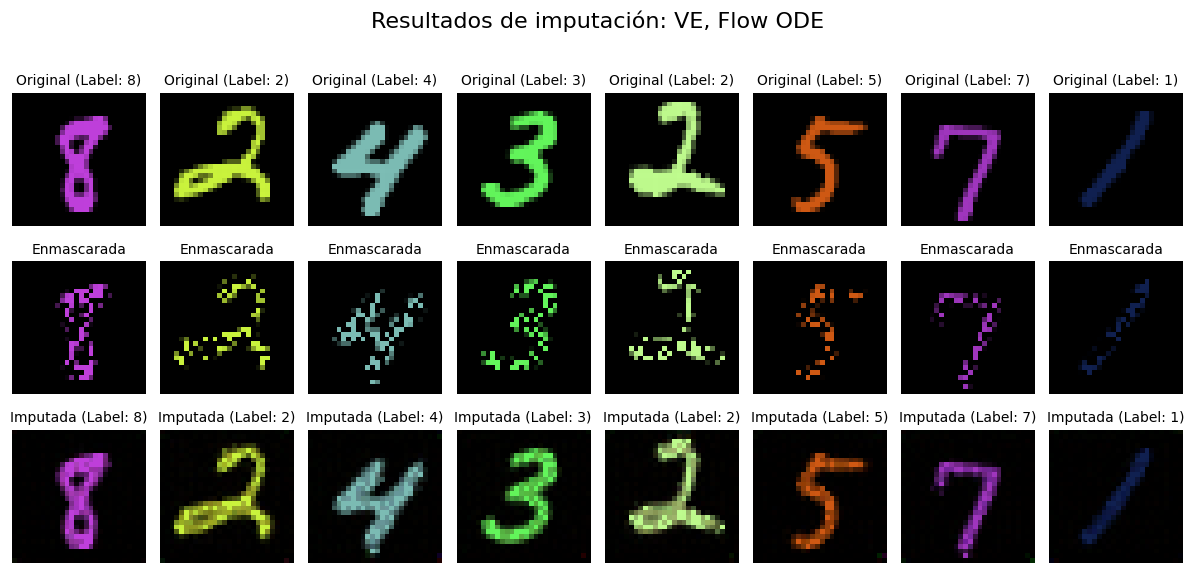

In [31]:
from generative_diffusion.controllable import random_mask

# Obtener un batch de imágenes del dataloader
images, labels = next(iter(train_dataloader))
images = images[:N_SAMPLES]
labels = labels[:N_SAMPLES]

# mask = center_square_mask(images, keep_ratio=0.4)
# mask = border_mask(images, border_ratio=0.3)
mask = random_mask(images, prob=0.4)

print("Imputando las imágenes enmascaradas...")
# Realizar la imputación
imputed_images, labels= diffusion_model_ve_flow_ode_imputation.impute(
    image=images,
    mask=mask,
    condition=labels,
)

# Mostrar resultados de imputación
show_imputation_results(images, mask, imputed_images,title = "Resultados de imputación: VE, Flow ODE", original_labels=labels, imputed_labels=labels)

## VP Linear - Exponencial Integrator

In [32]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_exponential_integrator_imputation = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-05 00:26:29,530 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [33]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_exponential_integrator_imputation.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-05 00:26:29,551 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-05 00:26:29,585 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:26:29,587 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:26:29,624 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:26:29,629 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:26:29,680 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Imputando las imágenes enmascaradas...


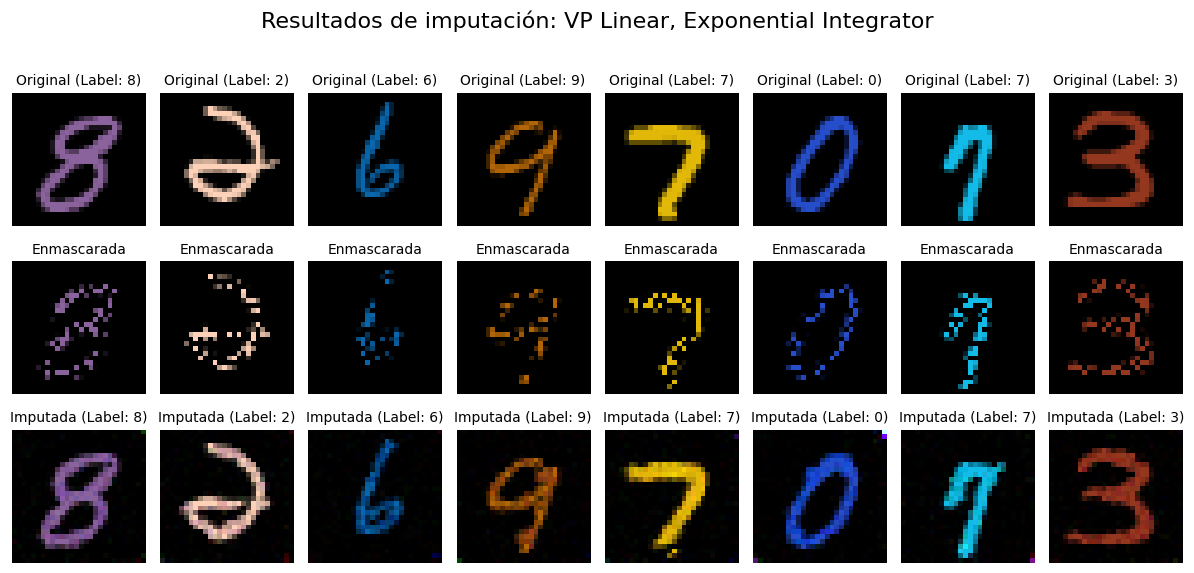

In [34]:
from generative_diffusion.controllable import random_mask

# Obtener un batch de imágenes del dataloader
images, labels = next(iter(train_dataloader))
images = images[:N_SAMPLES]
labels = labels[:N_SAMPLES]

# mask = center_square_mask(images, keep_ratio=0.4)
# mask = border_mask(images, border_ratio=0.3)
mask = random_mask(images, prob=0.4)

print("Imputando las imágenes enmascaradas...")
# Realizar la imputación
imputed_images, labels = diffusion_model_vp_linear_exponential_integrator_imputation.impute(
    image=images,
    mask=mask,
    condition=labels,
)

# Mostrar resultados de imputación
show_imputation_results(images, mask, imputed_images,title = "Resultados de imputación: VP Linear, Exponential Integrator", original_labels=labels, imputed_labels=labels)

## VP Cosine - Predictor Corrector

In [35]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_predictor_corrector_imputation = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
)

2025-05-05 00:26:35,486 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [36]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_predictor_corrector_imputation.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-05 00:26:35,513 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-05 00:26:35,563 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-05 00:26:35,566 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-05 00:26:35,613 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-05 00:26:35,617 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-05 00:26:35,675 — DiffusionModel — INFO — Generando 8 muestras con 500 pasos


Imputando las imágenes enmascaradas...


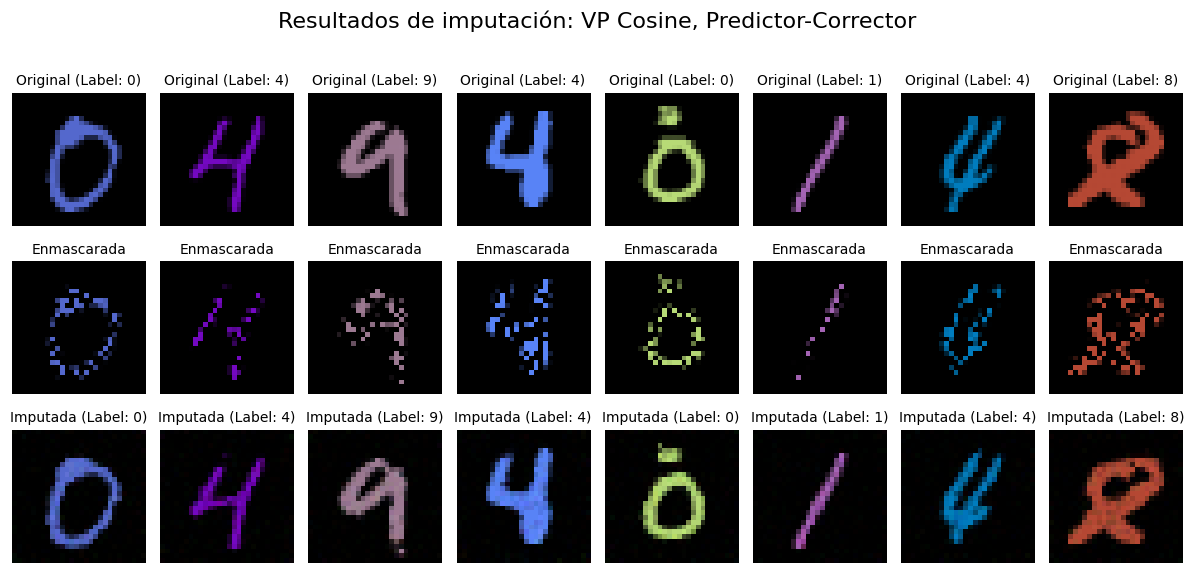

In [37]:
from generative_diffusion.controllable import random_mask

# Obtener un batch de imágenes del dataloader
images, labels = next(iter(train_dataloader))
images = images[:N_SAMPLES]
labels = labels[:N_SAMPLES]

# mask = center_square_mask(images, keep_ratio=0.4)
# mask = border_mask(images, border_ratio=0.3)
mask = random_mask(images, prob=0.4)

print("Imputando las imágenes enmascaradas...")
# Realizar la imputación
imputed_images, labels = diffusion_model_vp_cosine_predictor_corrector_imputation.impute(
    image=images,
    mask=mask,
    condition=labels,
)

# Mostrar resultados de imputación
show_imputation_results(images, mask, imputed_images,title = "Resultados de imputación: VP Cosine, Predictor-Corrector", original_labels=labels, imputed_labels=labels)